In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import wrangle

pd.options.display.max_columns = None

In [2]:
train, test, validate = wrangle.wrangle_zillow()

## Question:  
What are the strongest predictors for property value?

## Hypothesis:  
Location, structure size + lot size, age

In [3]:
train.head()

,parcelid,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,unitcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age
6816,12161651,3,1.0,1142,6037,1,34.206140,-118.142548,6416,30187,96265,0,1,1947,29594,58361,28767,False,Floor/Wall,0,1.0,70
50406,12607174,3,2.0,2072,6037,2,33.819596,-118.344648,6359,54722,96163,0,1,1954,112195,175134,62939,True,Floor/Wall,4,2.0,63
23474,14316877,3,3.0,2168,6059,3,33.601725,-117.877784,3540,53571,96957,6,1,1956,188947,615142,426195,False,Central,0,3.0,61
14242,13089704,4,3.0,1880,6037,3,34.017132,-117.883275,8519,34636,96522,0,1,1986,260000,678000,418000,False,Central,0,3.0,31
35766,14021653,5,3.0,2711,6059,3,33.671796,-117.940255,6262,38032,96958,9,1,1967,153384,569451,416067,False,Central,0,3.0,50


## Do structures decrease in value with age?

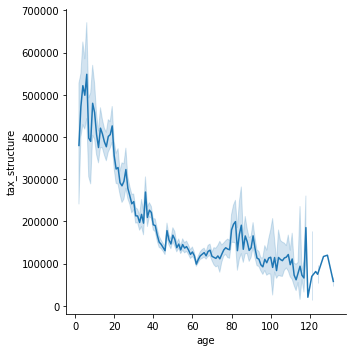

In [4]:
sns.relplot(data=train, x='age', y='tax_structure', kind='line')

#### Takeaways:
There seems to be a curving relationship between age and structure value.  This could be a strong predictor of structure value.

## What about the land's value and age?

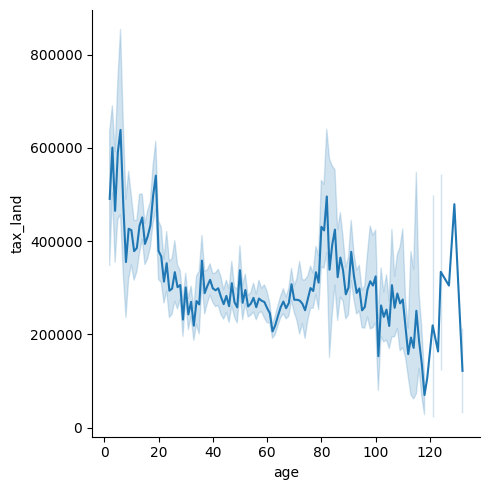

In [5]:
sns.relplot(data=train, x='age', y='tax_land', kind='line')

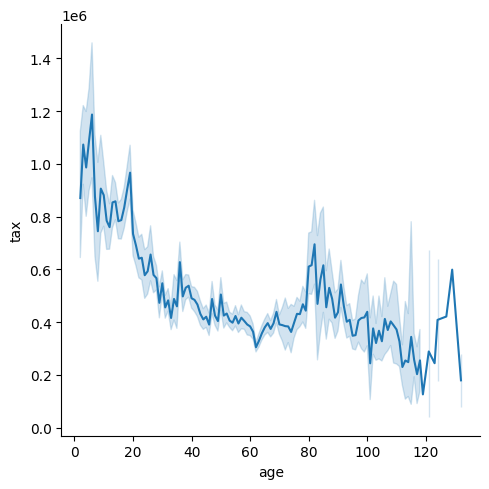

In [6]:
sns.relplot(data=train, x='age', y='tax', kind='line')

#### Takeaways:
This seems to reflect how the structure's value relates to age, but with a lot more noise.

### New Hypothesis: Land value is dependant on structure value

## How does land value affect structure value?

<AxesSubplot:xlabel='tax_structure', ylabel='tax_land'>

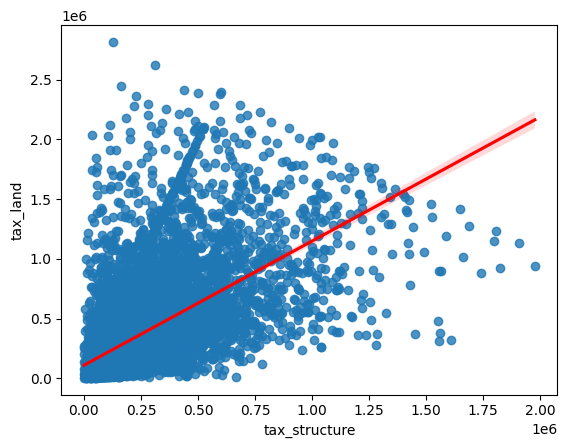

In [7]:
sns.regplot(data=train, x='tax_structure', y='tax_land', line_kws={'color':'red'})

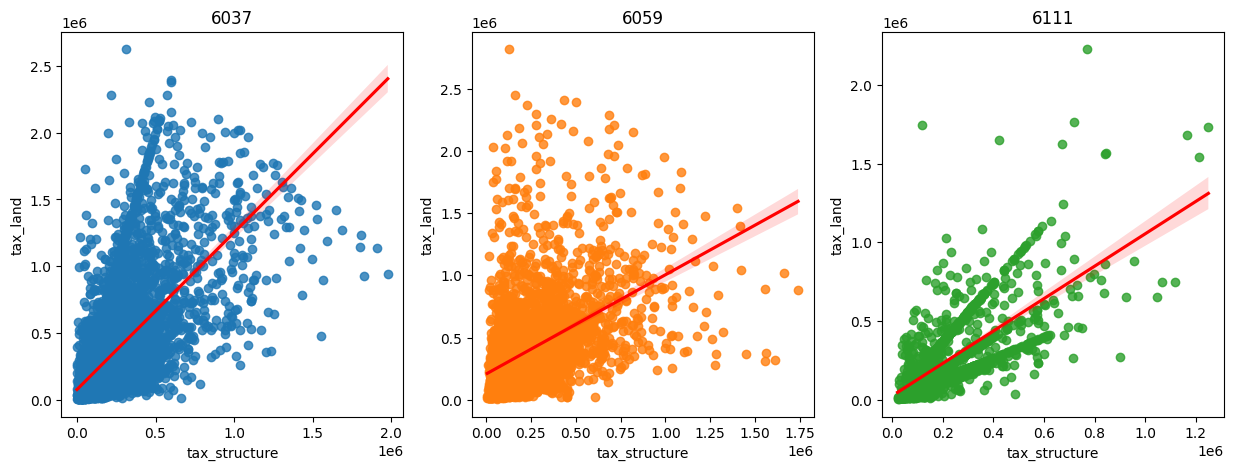

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='tax_structure', y='tax_land',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

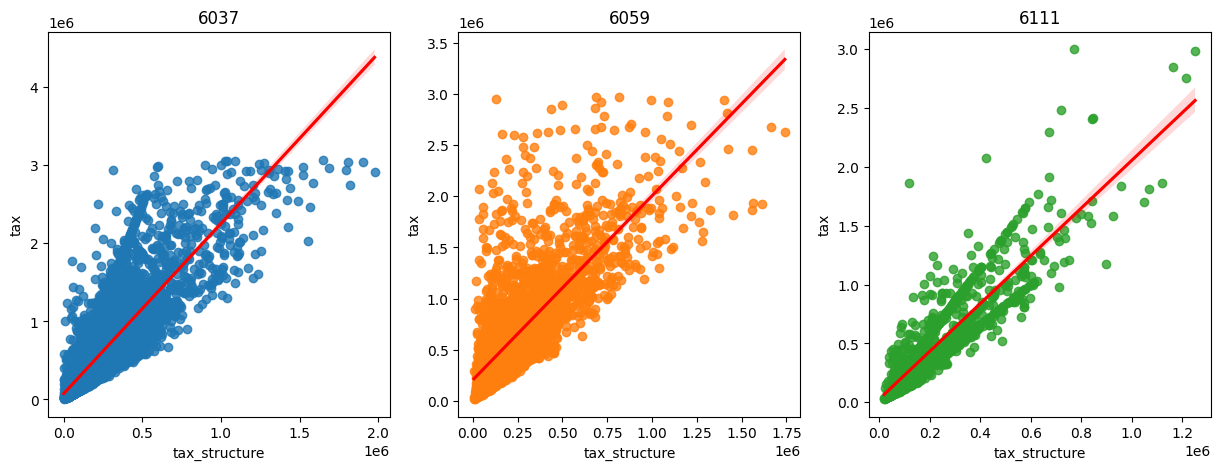

In [9]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='tax_structure', y='tax',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

## How does location affect value?

In [10]:
import plotly.express as px
fig = px.scatter_mapbox(train, lat="latitude", lon="longitude", color="tax", 
                    # size='structure_sqft',
                    color_continuous_scale=px.colors.sequential.Plasma, size_max=15, zoom=8)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":20,"t":0,"l":0,"b":0})
fig.update_layout(width=800, height= 700)
fig.show()

#### Takeaways
There are definitely some hotspots, but the location data won't play nicely with a linear regression model so we can't use it for now.  
A possible way forward would be to use clustering to group these into categories (hotspot/not-hotspot).

## How does structure sqft affect structure value ?

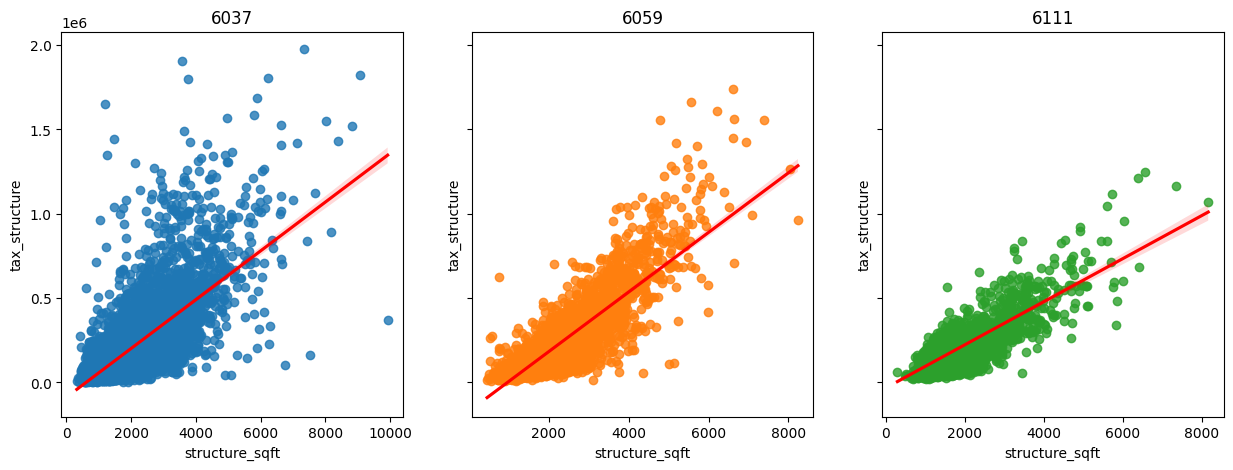

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='structure_sqft', y='tax_structure',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

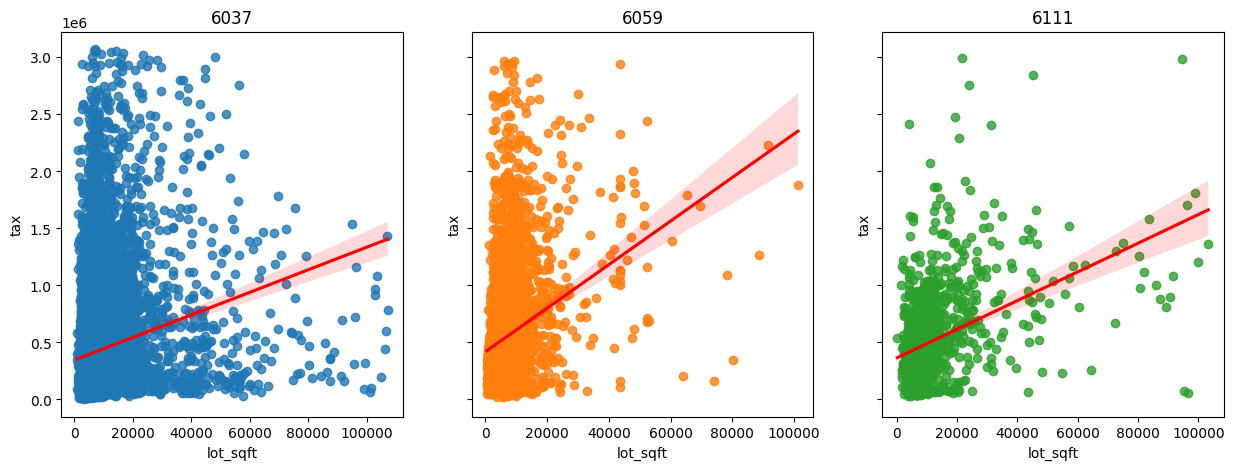

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
palette = sns.color_palette()
fipList = train.fips.unique().tolist()
for i, fip in enumerate(fipList):
    sns.regplot(data=train[train.fips == fip], x='lot_sqft', y='tax',
    color=palette[i],
    ax=ax[i],
    line_kws={'color':'red'})
    ax[i].set_title(fip)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

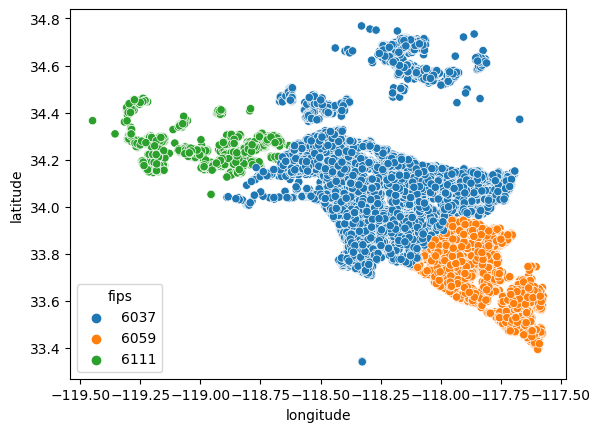

In [13]:
sns.scatterplot(data=train, y='latitude', x='longitude', hue='fips')

<AxesSubplot:xlabel='age', ylabel='structure_sqft'>

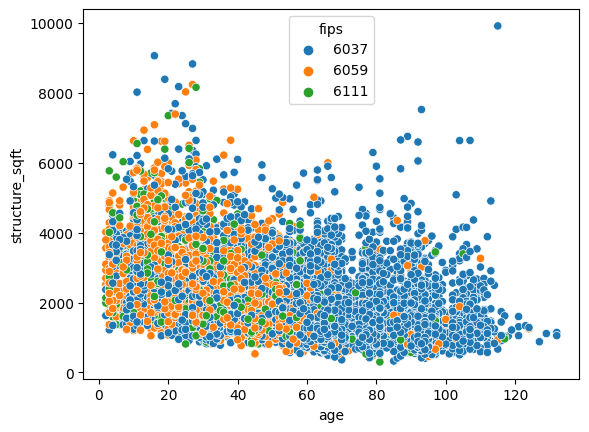

In [14]:
sns.scatterplot(data=train, y='structure_sqft', x='age', hue='fips')

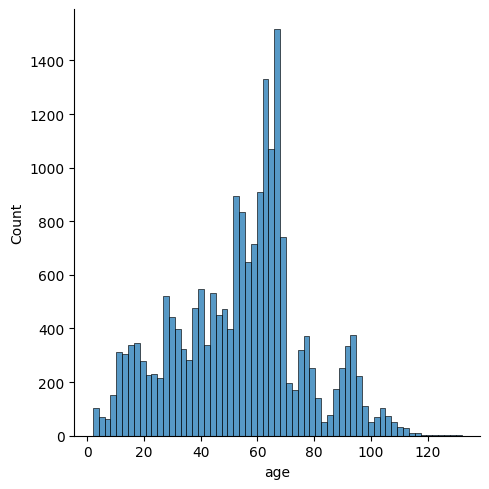

In [15]:
sns.displot(data=train, x='age')

# Blanket exploration

In [16]:
list(train.dtypes[(train.dtypes == 'category')| (train.dtypes == 'bool')].index)

['parcelid',
 'fips',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'taxdelinquencyflag',
 'heatingorsystemdesc']

In [17]:
# Ignore parcelid, regionidcity, regionidzip, yearbuilt
cat_cols = ['fips',
 'heatingorsystemdesc',
 'taxdelinquencyflag']

In [18]:
list(train.dtypes[(train.dtypes == 'int64')| (train.dtypes == 'float64')].index)

['bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'roomcnt',
 'unitcnt',
 'tax_structure',
 'tax',
 'tax_land',
 'years_tax_delinquent',
 'bathroom_sum',
 'age']

In [19]:
# Ignore latitude, longitude
num_cols = ['bedroomcnt',
 'calc_bath',
 'structure_sqft',
 'fullbathcnt',
 'lot_sqft',
 'roomcnt',
 'unitcnt',
 'tax_structure',
 'tax',
 'tax_land',
 'years_tax_delinquent',
 'bathroom_sum',
 'age']

In [20]:
import explore
# Takes forever to run, commented out.
# explore.plot_categorical_and_continuous_vars(train, cat_cols, num_cols)

In [21]:
# Takes forever to run, commented out.
# explore.plot_variable_pairs(train)

#### Takeaways
I didn't find any other interesting visualizations.

# Statistical Sanity check

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import wrangle
import explore

pd.options.display.max_columns = None

I will be using the following features for predicting the structure tax value:
- `structure square footage`
- `structure age`

I will also use the following feature to predict the total tax value:
- `predicted structure tax value`

To ensure that this plan is sound, I will use statistical analysis to determine the strength of the predictors.

### Is structure square footage a strong correlator to structure tax value?

`Null Hypothesis` : No correlation  
`Alternate Hypothesis`: Yes correlation

Text(0.5, 0.98, 'Distributions are parametric')

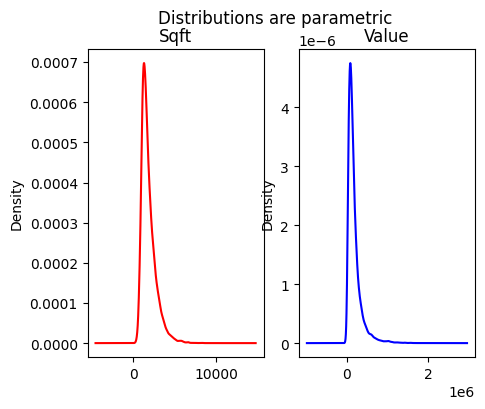

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (5,4))
train.structure_sqft.plot.kde(color='red', label='age', ax=ax1, title='Sqft')
train.tax_structure.plot.kde(color='blue', label='age', ax=ax2, title='Value')
fig.suptitle('Distributions are parametric')

Because the distributions are parametric we can use Pearsons-R correlation test.

In [41]:
r, p = stats.pearsonr(train.structure_sqft, train.tax_structure)
print(f'There is a {r:.2%} linear correlation between the variables with a {p:.2%} probability that the correlation was due to random chance.')

There is a 77.46% linear correlation between the variables with a 0.00% probability that the correlation was due to random chance.


> **Takeaway:**  
> Structure square footage is a strong predictor for predicting the tax value of the structure.

### Is structure age a strong correlator to structure tax value?

I can't find a way to test non-linear correlations.  Skipping for now.

### Is structure tax value a strong correlator to total tax value?

`Null Hypothesis` : No correlation  
`Alternate Hypothesis`: Yes correlation

Text(0.5, 0.98, 'Distributions are parametric')

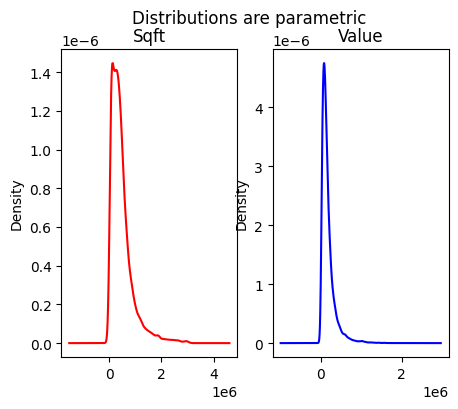

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (5,4))
train.tax_structure.plot.kde(color='blue', label='age', ax=ax2, title='Value')
train.tax.plot.kde(color='red', label='age', ax=ax1, title='Sqft')
fig.suptitle('Distributions are parametric')

In [43]:
r, p = stats.pearsonr(train.tax, train.tax_structure)
print(f'There is a {r:.2%} linear correlation between the variables with a {p:.2%} probability that the correlation was due to random chance.')

There is a 81.23% linear correlation between the variables with a 0.00% probability that the correlation was due to random chance.


> **Takeaway:**  
> Structure tax value is a strong predictor for predicting the overall value of the property.